In [17]:
import pandas as pd
import numpy as np
import pickle

In [18]:
df_csv= pd.read_pickle("../df_noplus/df5.pkl")

In [19]:
all_subjects=df_csv['COURSEID'].value_counts()
##removing any subject enrolled less than 20 times
m20=all_subjects[all_subjects[:]>=20]
print df_csv.shape
df_csv=df_csv[df_csv["COURSEID"].isin(m20.index)]
print df_csv.shape

(28272, 199)
(27994, 199)


In [20]:
df=df_csv[df_csv['COURSEID']=='CS213']
#df["COURSEID"].value_counts()
#df=pd.read_csv('../df_m20/df_CS213.csv',index_col=0)
df=df.iloc[np.random.permutation(len(df))]

In [21]:
x_head=df.columns[4:]
y_head=['GRADE']
print x_head
print y_head
x=df.as_matrix(x_head)
y=df.as_matrix(y_head).T[0]

Index([u'AN201', u'AS171', u'AS177', u'AS178', u'AT207', u'AT316', u'AT326',
       u'AT336', u'AT346', u'AT366',
       ...
       u'TU110', u'TU111', u'TU115', u'TU116', u'TU120', u'TU122', u'TU130',
       u'TU153', u'TU154', u'TU156'],
      dtype='object', length=195)
['GRADE']


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm
from sklearn.cross_validation import cross_val_score

clf_dt = DecisionTreeClassifier(max_depth=None, 
    min_samples_split=1, random_state=None, max_features=None)
scores = cross_val_score(clf_dt, x, y, cv=5)
print scores
print "--Decision Tree: %s"%scores.mean()

clf_rf=RandomForestClassifier(n_estimators=10, max_depth=None, 
    min_samples_split=1, random_state=None, max_features=None)
scores = cross_val_score(clf_rf, x, y, cv=5)
print scores
print "--Random Forest: %s"%scores.mean()

clf_et = ExtraTreesClassifier(n_estimators=10, max_depth=None, 
    min_samples_split=1, random_state=None, max_features=None)
scores = cross_val_score(clf_et, x, y, cv=5)
print scores
print "--Extra Tree: %s"%scores.mean()

clf_svm = svm.SVC()
scores = cross_val_score(clf_svm, x, y, cv=5)
print scores
print "--SVM: %s"%scores.mean()

[ 0.38709677  0.46753247  0.50657895  0.40131579  0.44078947]
--Decision Tree: 0.44066269045
[ 0.50967742  0.52597403  0.55921053  0.49342105  0.50657895]
--Random Forest: 0.518972394329
[ 0.49032258  0.49350649  0.58552632  0.44078947  0.49342105]
--Extra Tree: 0.500713183251
[ 0.4516129   0.46103896  0.50657895  0.5         0.46710526]
--SVM: 0.477267214958


In [7]:
scores.mean()

0.49422772473706261

In [8]:
h=5
clf_et.fit(x[len(y)/h:],y[len(y)/h:])
dif=[];
clmax=9
cm=np.zeros((clmax,clmax))
yp=[]
ya=[]
for i in xrange(len(y)/h):
    gp=clf_et.predict(x[i,:])[0]
    ga=y[i]
    yp.append(gp)
    ya.append(ga)
    cm[gp,ga] +=1
    dif.append(ga-gp)
    print "actual: %d, prediction: %d"%(ga,gp)
print "***confusion matrix"
print cm

from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(ya, yp))
print(rms)

actual: 5, prediction: 5
actual: 5, prediction: 4
actual: 8, prediction: 8
actual: 6, prediction: 6
actual: 5, prediction: 6
actual: 6, prediction: 6
actual: 5, prediction: 3
actual: 6, prediction: 5
actual: 6, prediction: 7
actual: 7, prediction: 6
actual: 6, prediction: 6
actual: 5, prediction: 6
actual: 5, prediction: 4
actual: 6, prediction: 6
actual: 5, prediction: 6
actual: 7, prediction: 7
actual: 7, prediction: 7
actual: 6, prediction: 6
actual: 4, prediction: 5
actual: 6, prediction: 6
actual: 5, prediction: 5
actual: 5, prediction: 5
actual: 6, prediction: 6
actual: 5, prediction: 4
actual: 6, prediction: 6
actual: 5, prediction: 3
actual: 6, prediction: 5
actual: 6, prediction: 6
actual: 5, prediction: 6
actual: 7, prediction: 7
actual: 6, prediction: 6
actual: 7, prediction: 7
actual: 4, prediction: 5
actual: 6, prediction: 6
actual: 6, prediction: 6
actual: 4, prediction: 5
actual: 8, prediction: 7
actual: 8, prediction: 7
actual: 6, prediction: 6
actual: 5, prediction: 6



Bad key "axes.spines.right" on line 210 in
C:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://matplotlib.sf.net/_static/matplotlibrc or from the matplotlib source
distribution

Bad key "boxplot.flierprops.linewidth" on line 321 in
C:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://matplotlib.sf.net/_static/matplotlibrc or from the matplotlib source
distribution

Bad key "contour.corner_mask" on line 306 in
C:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\classic.mplstyle.
You probably need to get an updated matplotlibrc file from
http://matplotlib.sf.net/_static/matplotlibrc or from the matplotlib source
distribution

Bad key "boxplot.vertical" on line 339 in
C:\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\classic.mplstyle.
You probably need to get an updated matplotlibrc file from
h

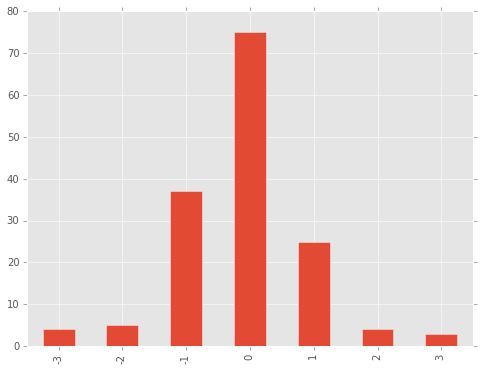

In [9]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
df_dif=pd.DataFrame({'dif':dif})
plt.rcParams['figure.figsize'] = (8,6)
df_dif.dif.value_counts().sort_index().plot(kind='bar')

In [10]:
precision_dt={}
precision_rf={}
precision_et={}
precision_svm={}
for subject,count in all_subjects.iteritems():
    print subject
    ##load data
    dfx=df_csv[df_csv['COURSEID']==subject]
    dfx=dfx.iloc[np.random.permutation(len(dfx))]
    ##convert to np.array
    x=dfx.as_matrix( dfx.columns[4:] )
    y=dfx.as_matrix( ['GRADE'] ).T[0]
    ##evaluation
    precision_dt[subject]=cross_val_score(clf_dt, x, y, cv=5).mean()
    precision_rf[subject]=cross_val_score(clf_rf, x, y, cv=5).mean()
    precision_et[subject]=cross_val_score(clf_et, x, y, cv=5).mean()
    precision_svm[subject]=cross_val_score(clf_svm, x, y, cv=5).mean()

MA211
CS102
CS101
TU154
TH161
CS111
CS213
EL171
SC135
PY228
EL172
SC185
TU110
CS223
TU120
ST216
CS284
EL295
TU130


C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:417: Warning: The least populated class in y has only 3 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


MA212
MA332
CS314
CS222
CS214


C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:417: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


CS261
CS251
CS281


C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:417: Warning: The least populated class in y has only 4 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


CS341
EL395
CS301
CS311
CS374
CS302


C:\Anaconda\lib\site-packages\sklearn\cross_validation.py:417: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=5.
  % (min_labels, self.n_folds)), Warning)


CS401
CS342
CS105
HO201
CS395
CS402
CS365
EL070
AT326
TU100
CS289
CS385
AT316
CS326
TU122
CS288
CS487
CS211
CS489
SC123
SC173
CS296
CS488
SW111
CS367
SW365
CS486
SW212
CS409
SW221
CS215
CS386
CS366
CS295
CS377
LA209
CS456
CS467
CS300
SW478
SW213
MW314
BA291
SW475
CS396
CS427
ES356
CS387
CS286
CS297
CS429
CS446
SW335
CS356
HR201
CS459
SO201
NS132
TA395
CJ321
CS397
CS398
CS348
CJ317
MW313
CJ316
MA216
CS407
CS115
CS457
CS388
CS426
CS449
CS408
CJ315
CS285
CS399
PY218


ValueError: Cannot have number of folds n_folds=5 greater than the number of samples: 0.

In [ ]:
import datetime
import pickle
filename= datetime.datetime.now().strftime("%y%m%d_%H%M")+".pic"
with open(filename, 'wb') as pickleFile:
    mydata=(precision_dt,precision_rf,precision_et,precision_svm)
    pickle.dump(mydata, pickleFile, pickle.HIGHEST_PROTOCOL)
    
with open(filename, 'rb') as pickleFile:
    precision_dt,precision_rf,precision_et,precision_svm = pickle.load(pickleFile)



In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20,15)
plt.title("Numbers of Enrollments")
plt.xlabel("Subjects")
plt.ylabel("Counts")
m20.plot(kind='bar')

In [ ]:
df_precision = pd.DataFrame(m20.copy(), columns=['DT'])
df_precision['RF'] = m20.copy()
df_precision['ET'] = m20.copy()
df_precision['SVM'] = m20.copy()
for subject,count in m20.iteritems():
    print subject
    df_precision['DT'].loc[subject]=precision_dt[subject]
    df_precision['RF'].loc[subject]=precision_rf[subject]
    df_precision['ET'].loc[subject]=precision_et[subject]
    df_precision['SVM'].loc[subject]=precision_svm[subject]
    
plt.rcParams['figure.figsize'] = (20,15)
plt.title("Classifier Comparison")
plt.xlabel("Subjects")
plt.ylabel("precision")
df_precision.plot(kind='bar')

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df_precision.to_pickle("df_precision.pkl")
df_precision= pd.read_pickle("df_precision.pkl")
plt.rcParams['figure.figsize'] = (32, 24)

df_precision.plot(kind='bar')
plt.title("Classifier Comparison")
plt.xlabel("Subjects")
plt.ylabel("precision")

In [ ]:
df_precision_rf=m20.copy()
for subject,count in m20.iteritems():
    df_precision_rf.loc[subject]=precision_rf[subject]
plt.rcParams['figure.figsize'] = (20,15)
plt.title("Random Forest")
plt.xlabel("Subjects")
plt.ylabel("precision")
df_precision_rf.plot(kind='bar')

In [ ]:
df_precision=pd.DataFrame({})
for subject,count in m20.iteritems():
    df_precision_et.loc[subject]=precision_et[subject]
plt.rcParams['figure.figsize'] = (20,15)
plt.title("Extra Tree")
plt.xlabel("Subjects")
plt.ylabel("precision")
df_precision_et.plot(kind='bar')

In [ ]:
df_csv[df_csv['COURSEID']=='EL070']

In [ ]:
df_csv[df_csv['COURSEID']=='NS132']

In [ ]:
df_grade=m20.copy().astype(float)
for subject,count in m20.iteritems():
    df_grade[subject] = df_csv[df_csv["COURSEID"]==subject]["GRADE"].mean()
plt.rcParams['figure.figsize'] = (20,15)
plt.title('''Average Result from CS student enrollments [A=8] ''')
plt.xlabel("Subjects")
plt.ylabel("A is 8")
m20.plot(kind='bar',color='green')

In [ ]:
df_csv[df_csv["COURSEID"]==subject]["GRADE"].mean()

In [ ]:
print 1,
print 2,

In [ ]:
df_rms

In [16]:
yp

[5,
 4,
 8,
 6,
 6,
 6,
 3,
 5,
 7,
 6,
 6,
 6,
 4,
 6,
 6,
 7,
 7,
 6,
 5,
 6,
 5,
 5,
 6,
 4,
 6,
 3,
 5,
 6,
 6,
 7,
 6,
 7,
 5,
 6,
 6,
 5,
 7,
 7,
 6,
 6,
 4,
 6,
 5,
 4,
 6,
 4,
 6,
 5,
 6,
 6,
 6,
 6,
 5,
 5,
 6,
 5,
 5,
 5,
 6,
 8,
 4,
 6,
 6,
 5,
 6,
 7,
 5,
 6,
 6,
 4,
 6,
 5,
 8,
 6,
 7,
 6,
 8,
 6,
 8,
 6,
 7,
 3,
 5,
 4,
 5,
 4,
 5,
 6,
 7,
 5,
 6,
 5,
 6,
 4,
 6,
 6,
 3,
 5,
 5,
 5,
 7,
 7,
 4,
 3,
 6,
 6,
 6,
 5,
 7,
 6,
 4,
 5,
 6,
 6,
 6,
 6,
 7,
 5,
 5,
 7,
 5,
 6,
 5,
 6,
 6,
 6,
 6,
 7,
 5,
 6,
 6,
 6,
 8,
 5,
 5,
 5,
 6,
 8,
 6,
 5,
 5,
 8,
 5,
 5,
 4,
 6,
 6,
 6,
 6,
 6,
 7,
 6,
 6]

In [12]:
y

array([], dtype=int64)